In [9]:
import requests

year = 2023
day = 18

url = f"https://adventofcode.com/{year}/day/{day}/input"

with open("cookie.txt", "r") as file:
    session = file.read()

headers = {"cookie": f"session={session}"}

with open(f"inputs/day_{str(day).zfill(2)}_input.txt", "wb") as file:
    file.write(requests.get(url, headers=headers).content)

lines = [x.strip() for x in open(f"inputs/day_{str(day).zfill(2)}_input.txt", "r")]
print(lines[:5])

['R 3 (#6289d0)', 'U 2 (#6a5a63)', 'R 3 (#49a250)', 'U 9 (#290bb3)', 'R 6 (#8ec710)']


{(0, 0)}
-106 291
-8 304


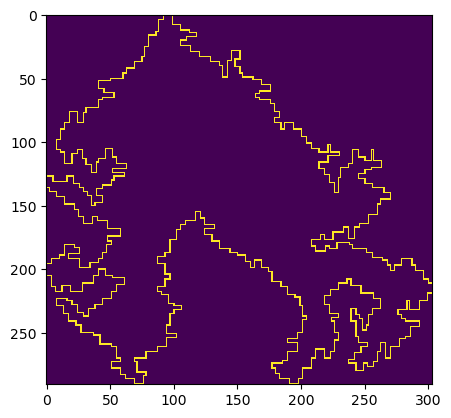

3168


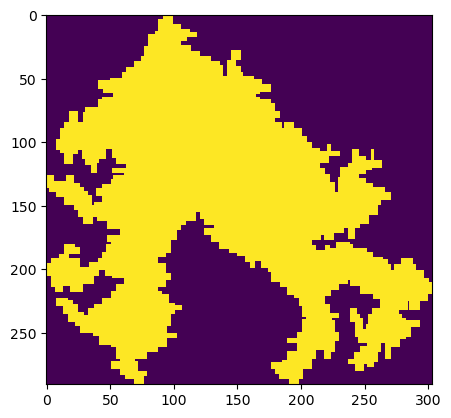

41019.0


In [85]:
import numpy as np
import matplotlib.pyplot as plt

test = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)""".split(
    "\n"
)

source = lines

start = (0, 0)

points = {start}

print(points)

current = start
for ins in source:
    dirn, dist, code = ins.split(" ")

    dist = int(dist)

    dirn_v = {"R": (0, 1), "L": (0, -1), "U": (1, 0), "D": (-1, 0)}[dirn]

    for i in range(dist):
        current = (current[0] + dirn_v[0], current[1] + dirn_v[1])
        points.add(current)

offset_r = min(p[0] for p in points)
range_r = max(p[0] for p in points) - offset_r + 1
offset_c = min(p[1] for p in points)
range_c = max(p[1] for p in points) - offset_c + 1

print(offset_r, range_r)
print(offset_c, range_c)
# print(points)

array = np.zeros((range_r, range_c))

for r in range(offset_r, offset_r + range_r):
    line = ""
    for c in range(offset_c, offset_c + range_c):
        if (r, c) in points:
            array[r - offset_r][c - offset_c] = 1
            line += "#"
        else:
            line += "."
    # print(line)

# print(array)
plt.imshow(array, interpolation="none")
plt.show()
print(len(points))
import sys

sys.setrecursionlimit(max(range_c, range_r) ** 2)
# sys. setrecursionlimit(1000)

visited = {()}
filled = {()}


def floodfill(matrix, x, y, coming_from):
    # "hidden" stop clause - not reinvoking for "c" or "b", only for "a".
    # if (x,y) in visited:
    #     return
    # else:
    #     visited.add((x,y))

    if matrix[x][y] == 0:
        filled.add((x, y))
        matrix[x][y] = 1
        # recursively invoke flood fill on all surrounding cells:
        if x > 0:  # and coming_from != 0:
            floodfill(matrix, x - 1, y, 1)
        if x < matrix.shape[0]:  # and coming_from != 1:
            floodfill(matrix, x + 1, y, 0)
        if y > 0:  # and coming_from != 2:
            floodfill(matrix, x, y - 1, 3)
        if y < matrix.shape[1]:  # len(matrix[y])  -1 and coming_from != 3:
            floodfill(matrix, x, y + 1, 2)


flooded = array.copy()

# visualised guess
floodfill(flooded, 100, 100, -1)

plt.imshow(flooded, interpolation="none")
plt.show()
print(np.sum(flooded))

{(0, 0)}
-3776 9068
-1125 6111


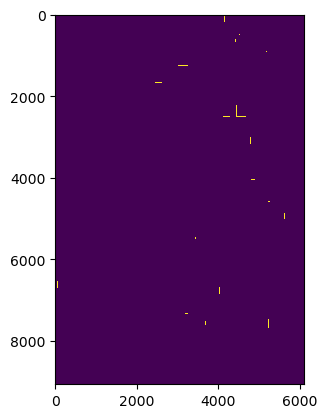

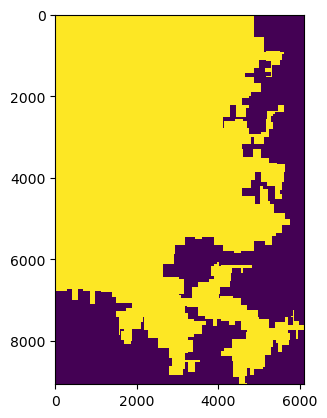

37300564.0


In [12]:
import numpy as np
import matplotlib.pyplot as plt

test = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)""".split(
    "\n"
)

source = lines

start = (0, 0)

points = {start}

print(points)

current = start
for ins in source:
    dirn, dist, code = ins.split(" ")

    dist = int(dist)

    dist = int(code[2:7], 16)
    dist = int(code[2:5], 16) // 8
    dirn = code[7]

    dirn_v = {"0": (0, 1), "2": (0, -1), "3": (1, 0), "1": (-1, 0)}[dirn]

    for i in range(dist):
        current = (current[0] + dirn_v[0], current[1] + dirn_v[1])
        points.add(current)


offset_r = min(p[0] for p in points)
range_r = max(p[0] for p in points) - offset_r + 1
offset_c = min(p[1] for p in points)
range_c = max(p[1] for p in points) - offset_c + 1

print(offset_r, range_r)
print(offset_c, range_c)
# print(points)

array = np.zeros((range_r, range_c))

for r in range(offset_r, offset_r + range_r):
    line = ""
    for c in range(offset_c, offset_c + range_c):
        if (r, c) in points:
            array[r - offset_r][c - offset_c] = 1
            line += "#"
        else:
            line += "."
    # print(line)

# print(array)
plt.imshow(array, interpolation="none")
plt.show()
import sys

sys.setrecursionlimit(max(range_c, range_r) ** 2)
# sys. setrecursionlimit(1000)

visited = {()}
filled = {()}


def floodfill(matrix, x, y, coming_from):
    # "hidden" stop clause - not reinvoking for "c" or "b", only for "a".
    # if (x,y) in visited:
    #     return
    # else:
    #     visited.add((x,y))

    if matrix[x][y] == 0:
        filled.add((x, y))
        matrix[x][y] = 1
        # recursively invoke flood fill on all surrounding cells:
        if x > 0:  # and coming_from != 0:
            floodfill(matrix, x - 1, y, 1)
        if x < matrix.shape[0]:  # and coming_from != 1:
            floodfill(matrix, x + 1, y, 0)
        if y > 0:  # and coming_from != 2:
            floodfill(matrix, x, y - 1, 3)
        if y < matrix.shape[1]:  # len(matrix[y])  -1 and coming_from != 3:
            floodfill(matrix, x, y + 1, 2)


flooded = array.copy()

# visualised guess
floodfill(flooded, 100, 100, -1)

plt.imshow(flooded, interpolation="none")
plt.show()
print(np.sum(flooded))

In [54]:
import math
import numpy as np
import matplotlib.pyplot as plt

test = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)""".split(
    "\n"
)

source = lines

start = (0, 0)

points = [start]

print(points)

perimeter = 0

current = start
for ins in source:
    dirn, dist, code = ins.split(" ")

    dist = int(dist)

    dist = int(code[2:7], 16)
    # dist = int(code[2:5], 16)//8
    dirn = code[7]

    dirn_v = {"0": (0, 1), "2": (0, -1), "3": (1, 0), "1": (-1, 0)}[dirn]

    current = (current[0] + dirn_v[0] * dist, current[1] + dirn_v[1] * dist)
    points.append(current)

    perimeter += dist

print(perimeter)


offset_r = min(p[0] for p in points)
range_r = max(p[0] for p in points) - offset_r + 1
offset_c = min(p[1] for p in points)
range_c = max(p[1] for p in points) - offset_c + 1

offset_points = []

for point in points:
    offset_points.append((point[0] - offset_r, point[1] - offset_c))

offset_points = offset_points[:-1]
print(offset_points)

# shoelace theorem
lhs = 0
rhs = 0
for i in range(len(offset_points)):
    lhs += offset_points[i][0] * offset_points[(i + 1) % len(offset_points)][1]
    rhs += offset_points[(i + 1) % len(offset_points)][0] * offset_points[i][1]

area = (lhs - rhs) / 2
print(area, perimeter, area + perimeter)
print(area + perimeter / 2 + 1)

# also have to include trench (perimeter).

[(0, 0)]
174091222
[(7753763, 2312432), (7753763, 2716045), (8189385, 2716045), (8189385, 3017650), (8357508, 3017650), (8357508, 3602467), (8896197, 3602467), (8896197, 3833796), (9104926, 3833796), (9104926, 4073621), (9769800, 4073621), (9769800, 4401317), (9785177, 4401317), (9785177, 4233442), (10234319, 4233442), (10234319, 4220250), (10277925, 4220250), (10277925, 3973804), (10777109, 3973804), (10777109, 3473735), (10277925, 3473735), (10277925, 3310269), (10695583, 3310269), (10695583, 2716045), (11059985, 2716045), (11059985, 2312432), (11665150, 2312432), (11665150, 1930078), (12014635, 1930078), (12014635, 1416296), (12112663, 1416296), (12112663, 759152), (12139326, 759152), (12139326, 868427), (12660044, 868427), (12660044, 1296807), (12742305, 1296807), (12742305, 1472505), (12660044, 1472505), (12660044, 2029133), (12780197, 2029133), (12780197, 1834428), (13057491, 1834428), (13057491, 1334957), (12780197, 1334957), (12780197, 1172516), (12941094, 1172516), (12941094, 